In [1]:
import pandas as pd
import numpy as np

In [2]:
deaths = pd.read_csv('deaths.csv')
reinf = pd.read_csv('reinfections.csv')
inf = pd.read_csv('infections.csv')
vacc = pd.read_csv('vaccine.csv')

In [3]:
deaths.reset_index(inplace = True)
deaths.drop(columns = ['time'], inplace = True)
deaths.rename(columns = {'index': 'Time'}, inplace = True)
deaths = deaths[['Time', 'deaths']]
deaths.head()

,Time,deaths
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [4]:
reinf.reset_index(inplace = True)
reinf.drop(columns = ['time'], inplace = True)
reinf.rename(columns = {'index': 'Time'}, inplace = True)
reinf = reinf[['Time', 'reinfections']]
reinf.head()

,Time,reinfections
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [5]:
inf.reset_index(inplace = True)
inf.drop(columns = ['time'], inplace = True)
inf.rename(columns = {'index': 'Time'}, inplace = True)
inf.head()

,Time,infections
0,0,10
1,1,25
2,2,40
3,3,46
4,4,60


In [6]:
vacc.reset_index(inplace = True)
vacc.drop(columns = ['time'], inplace = True)
vacc.rename(columns = {'index': 'Time'}, inplace = True)
vacc.head()

,Time,vaccinated
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [7]:
df = pd.merge(inf, reinf, on = "Time")
df1 = pd.merge(df, vacc, on = 'Time')
df2 = pd.merge(df1, deaths, on = 'Time')
df2.head()

,Time,infections,reinfections,vaccinated,deaths
0,0,10,0,0,0
1,1,25,0,0,0
2,2,40,0,0,0
3,3,46,0,0,0
4,4,60,0,1,0


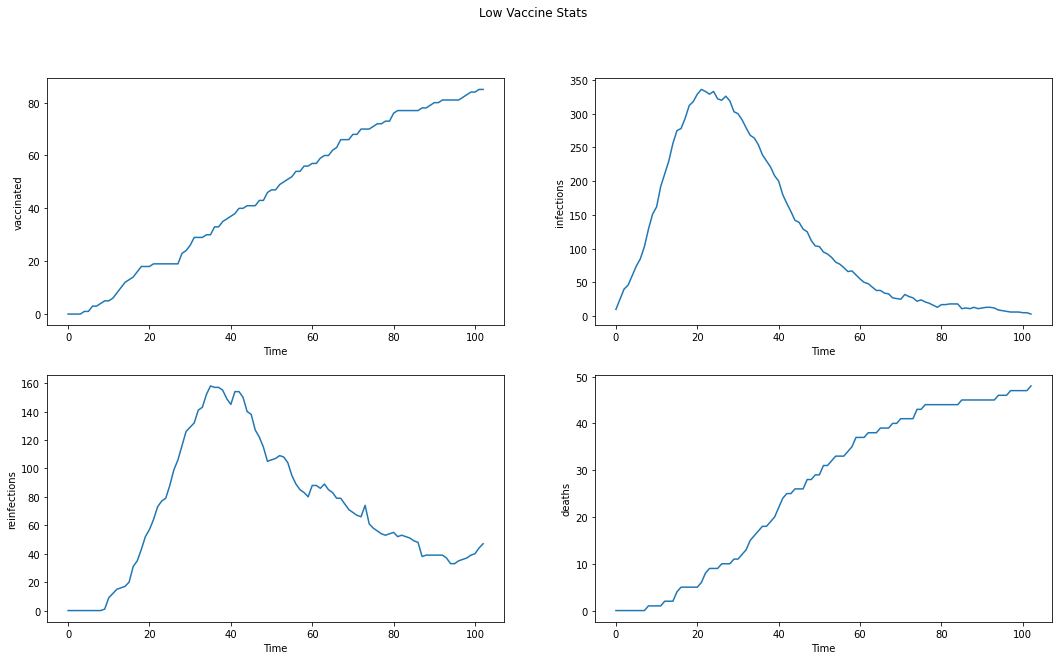

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 2, figsize = (18, 10))

fig.suptitle('Low Vaccine Stats')

sns.lineplot(ax = axes[0, 0], data = df2, x = 'Time', y = 'vaccinated')
sns.lineplot(ax = axes[0, 1], data = df2, x = 'Time', y = 'infections')
sns.lineplot(ax = axes[1, 0], data = df2, x = 'Time', y = 'reinfections')
sns.lineplot(ax = axes[1, 1], data = df2, x = 'Time', y = 'deaths')

figure = fig.get_figure()    
figure.savefig('low-stats.png', dpi = 400)